In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

from src.student_caller import one_random_student
from src.student_list import student_first_names

import tensorflow as tf
import tensorflow.keras 

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will be working with the breast cancer dataset for this review.  We can get the data from both Kaggle and Sklearn, or, in the present case, from the data folder.

In [3]:
# Import the data from data folder
df = pd.read_csv('data/breast_cancer.csv')

In [4]:
# Inspect the data.  What do we need to look for?
df.sample(5)

# diagnosis (B or M for benign or malignent) is our target variable

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
178,873357,B,13.01,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,...,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843,NaN
193,875263,M,12.34,26.86,81.15,477.4,0.10340,0.13530,0.108500,0.045620,...,39.34,101.70,768.9,0.17850,0.47060,0.442500,0.145900,0.3215,0.12050,NaN
337,897630,M,18.77,21.43,122.90,1092.0,0.09116,0.14020,0.106000,0.060900,...,34.37,161.10,1873.0,0.14980,0.48270,0.463400,0.204800,0.3679,0.09870,NaN
284,8912284,B,12.89,15.70,84.08,516.6,0.07818,0.09580,0.111500,0.033900,...,19.69,92.12,595.6,0.09926,0.23170,0.334400,0.101700,0.1999,0.07127,NaN
266,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.026420,...,22.94,78.28,424.8,0.12130,0.25150,0.191600,0.079260,0.2940,0.07587,NaN


In [9]:
df.info()
# entire column Unnamed: 32 are null so we can just drop it
# df.drop("Unnamed: 32", axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [13]:
# df.describe()

In [10]:
df.set_index('id', drop=True, inplace=True)

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
y = df['diagnosis']

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [20]:
X = df.drop('diagnosis', axis=1)

In [21]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
np.unique(y, return_counts=True)

(array([0, 1]), array([357, 212], dtype=int64))

In [27]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
X_t, X_v, y_t, y_v = train_test_split(X_train, y_train, test_size=.25, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_t_ss = ss.fit_transform(X_t)
X_v_ss = ss.transform(X_v)

In [30]:
ss_test = StandardScaler()

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

Let's instantiate our model. If we want a feed forward model, one which only propogates information forward from one layer to the next, what type of model do we need? 

In [33]:
import keras
from keras.models import Sequential

model = Sequential()

If we want layers in which every neuron is connected to the next, what type of layer do we need to add?

In [34]:
from keras.layers import Dense

The first layer will need to include our input dimensions, which we can inspect with shape.

In [35]:
model.add(Dense(units=10, activation='relu', input_shape=(X_t.shape[1], )))

In [ ]:
# Now let's add an output layer. 
# What parameters do we need in our output layer?
# No val data yet

In [37]:
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Why does the activation have to be sigmoid?

# because we need the output to be binary

In [ ]:
# If we were working with a target with muliple target classes, what would the activation be?

# activation would have to be softmax

In [ ]:
# Now we have to configure how the model learns.  What method do we use to configure the model?

In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])

In [ ]:
# Deep learning involves both forward and backward propogation.  Describe when the optimizer does it's work.
# during the backward propogation

In [ ]:
# If we had multi class, how would we change our arguments.
# change loss to categorical_crossentropy

In [ ]:
# Let's fit a FSM neural net

In [39]:
model.fit(X_t_ss, y_t)

10/10 [==============================] - 0s 2ms/step - loss: 0.5341 - recall: 0.9280


In [ ]:
# Interpret review_model.summary().  Explain why there are as many parameters as we see.

In [41]:
X_t_ss.shape

(319, 30)

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [71]:
model=Sequential()
model.add(Dense(units=15, activation='relu', input_shape=(X_t.shape[1],)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['Recall'], optimizer='adam')

from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)

model.fit(X_t_ss, y_t, epochs=100, validation_data=(X_v_ss, y_v), callbacks=[early_stopping_monitor], batch_size=10)

Epoch 1/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5070 - recall: 0.8960 - val_loss: 0.4029 - val_recall: 0.8788
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3187 - recall: 0.8720 - val_loss: 0.2609 - val_recall: 0.8182
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2237 - recall: 0.8960 - val_loss: 0.1953 - val_recall: 0.8182
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1768 - recall: 0.8960 - val_loss: 0.1619 - val_recall: 0.7879
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1485 - recall: 0.8960 - val_loss: 0.1389 - val_recall: 0.7879
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1297 - recall: 0.9040 - val_loss: 0.1217 - val_recall: 0.7879
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1158 - recall: 0.9200 - val_loss: 0.1066 - val_recall: 0.8485
Epoch 8/100
32/32 [======================

In [ ]:
# Let's visualize our loss and metric


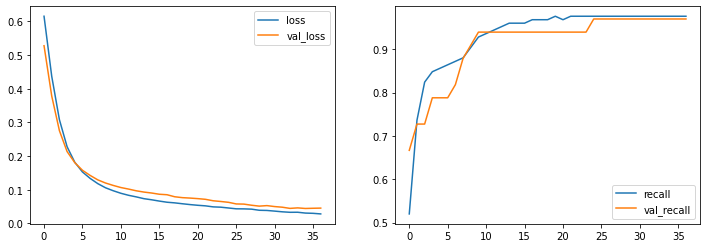

In [66]:
#__SOLUTION__

def plot_results(model):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,4))

    ax1.plot(model.history.epoch, model.history.history['loss'], label='loss')
    ax1.plot(model.history.epoch, model.history.history['val_loss'], label='val_loss')
    
    ax1.legend()
    
    ax2.plot(model.history.epoch, model.history.history['recall'], label='recall')
    ax2.plot(model.history.epoch, model.history.history['val_recall'], label='val_recall')

    ax2.legend()
    
    
plot_results(model)


In [72]:
y_hat_test = model.predict_classes(X_test_ss)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [81]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score

In [76]:
confusion_matrix(y_test, y_hat_test)

array([[84,  5],
       [ 1, 53]], dtype=int64)

In [79]:
recall_score(y_test, y_hat_test)

0.9814814814814815

In [82]:
accuracy_score(y_test, y_hat_test)

0.958041958041958